In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [257]:
books=pd.read_csv('/content/drive/MyDrive/Books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Ratings.csv')
users=pd.read_csv('/content/drive/MyDrive/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [258]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [259]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [260]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [261]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [262]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [263]:
ratings.duplicated().sum()

0

In [264]:
users.duplicated().sum()

0

In [265]:
books.duplicated().sum()

0

In [266]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [267]:
users.Age.isnull().sum()

110762

In [268]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### User and Rating

In [269]:
user_with_ratings = ratings.merge(users)
user_with_rating_count = user_with_ratings['User-ID'].value_counts().reset_index().rename(columns={'index':'User-ID', 'User-ID':'Count'})
user_with_rating_count.head()

,User-ID,Count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [270]:
user_with_rating_count.shape

(105283, 2)

In [271]:
user_with_rating_count[user_with_rating_count.Count==1].sum()

User-ID    8236431852
Count           59166
dtype: int64

In [272]:
user_with_rating_count.describe()

,User-ID,Count
count,105283.000000,105283.000000
mean,139474.738619,10.920851
std,80574.738184,90.562825
min,2.000000,1.000000
25%,69376.000000,1.000000
50%,139146.000000,1.000000
75%,209643.500000,4.000000
max,278854.000000,13602.000000


75% of `total number of rating count data set` are less than `4`, which is much less than the average i.e. `10.92`. Hence, we can conclude higher value rating counts are concentrated in the last quartile of the dataset. 🤔   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


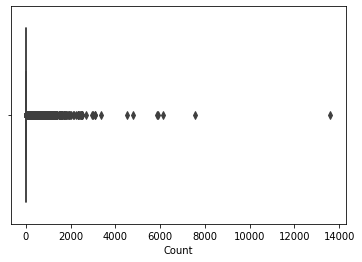

In [273]:
sb.boxplot(user_with_rating_count.Count)

In [274]:
user_with_rating_count.drop(user_with_rating_count[user_with_rating_count.Count <= 4].index,axis=0).describe()

,User-ID,Count
count,22816.000000,22816.000000
mean,139221.951569,45.097651
std,80828.339292,190.665436
min,8.000000,5.000000
25%,68559.500000,7.000000
50%,138715.500000,11.000000
75%,209529.250000,27.000000
max,278854.000000,13602.000000


In [275]:
user_with_rating_count.drop(user_with_rating_count[user_with_rating_count.Count <= 27].index,axis=0).describe()

,User-ID,Count
count,5576.000000,5576.000000
mean,140716.071377,151.972382
std,80226.812058,365.446636
min,183.000000,28.000000
25%,71732.250000,39.000000
50%,139908.500000,63.000000
75%,210751.500000,133.000000
max,278843.000000,13602.000000


In [276]:
user_with_rating_count.drop(user_with_rating_count[user_with_rating_count.Count <= 133].index,axis=0).describe()

,User-ID,Count
count,1388.000000,1388.000000
mean,141023.411383,436.626081
std,79186.822577,653.150333
min,183.000000,134.000000
25%,75472.000000,176.750000
50%,141467.500000,250.000000
75%,208965.000000,434.250000
max,278418.000000,13602.000000


Bringing threshold near 75% percentile

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


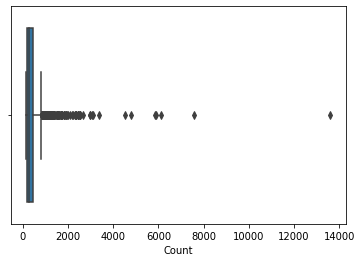

In [277]:
serious_user = user_with_rating_count.drop(user_with_rating_count[user_with_rating_count.Count <= 133].index,axis=0)
sb.boxplot(serious_user.Count)

#### Books

In [278]:
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [279]:
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [280]:
books[books['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Book Author is missing for 3 three rows and data of all other columns have sifted left one step

In [281]:
for i in books[books['Image-URL-L'].isnull()].index:
  books.loc[i,'Book-Author':'Image-URL-L'] = books[books.index==i][books.columns[2:]].shift(periods=1,axis=1).values

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            4
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [282]:
# books.drop(['Image-URL-S','Image-URL-L'],axis=1,inplace=True)
# books.head()

In [283]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                            

### Popularity Based Recommender System 

In [284]:
book_rating = books.merge(ratings)
book_rating.shape

(1031136, 10)

In [285]:
book_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [286]:
books.shape

(271360, 8)

In [287]:
book_rating.groupby('Book-Title').mean().reset_index()[['Book-Title','Book-Rating']]

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


But we should consider only serious users for average book rating 🤔

In [288]:
serious_user.head()

,User-ID,Count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [289]:
book_serious_rating = book_rating[book_rating['User-ID'].isin(serious_user['User-ID'].values)]
print(book_serious_rating.shape)
book_serious_rating.head()

(559242, 10)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
14,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325,6


In [290]:
book_serious_rating.groupby('Book-Title').mean().reset_index()[['Book-Title','Book-Rating']].sort_values('Book-Rating',ascending=False).head()

,Book-Title,Book-Rating
76084,Lewis and Clark College,10.0
97677,"Pagan Pathways, New Edition",10.0
33580,De Colores Means All of Us: Latina Views for a...,10.0
146861,The Prophet (Kahlil Gibran Pocket Library),10.0
146856,The Prophecies of Nostradamus: The Man Who Saw...,10.0


In [291]:
len(books['Book-Title'].unique())

242135

In [292]:
rating_count=book_rating['Book-Title'].value_counts().reset_index().rename(columns={'index':'Book-Title', 'Book-Title':'rating_count'})
rating_count.shape

(241071, 2)

In [293]:
rating_count.describe()

,rating_count
count,241071.000000
mean,4.277312
std,16.738685
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


75% of `total number of rating count data set` are less than `3`, which is less than the average i.e. `4.27`. Hence, we can conclude higher value rating counts are concentrated in the last quartile of the dataset. 🤔   

In [294]:
rating_count.drop(rating_count[rating_count.rating_count <= 3].index,axis=0).describe()

,rating_count
count,50574.000000
mean,14.976075
std,34.481719
min,4.000000
25%,5.000000
50%,7.000000
75%,13.000000
max,2502.000000


In [295]:
rating_count.drop(rating_count[rating_count.rating_count <= 43].index,axis=0).describe()

,rating_count
count,2867.000000
mean,107.544123
std,104.696026
min,44.000000
25%,55.000000
50%,74.000000
75%,118.000000
max,2502.000000


In [296]:
rating_count.drop(rating_count[rating_count.rating_count <= 43].index,axis=0,inplace=True)
print(rating_count.shape)
rating_count.head()

(2867, 2)


,Book-Title,rating_count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [297]:
len(rating_count['Book-Title'].unique())

2867

In [298]:
book_serious_rating.shape

(559242, 10)

In [299]:
book_serious_rating=book_serious_rating[book_serious_rating['Book-Title'].isin(rating_count['Book-Title'].values)]
print(book_serious_rating.shape)
book_serious_rating.head()

(145638, 10)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0


In [300]:
book_avg_rating=book_serious_rating.groupby('Book-Title').mean().reset_index()[['Book-Title','Book-Rating']].sort_values('Book-Rating',ascending=False)
book_avg_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 1432 to 2493
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Title   2867 non-null   object 
 1   Book-Rating  2867 non-null   float64
dtypes: float64(1), object(1)
memory usage: 67.2+ KB


In [301]:
book_avg_rating.rename(columns={'Book-Rating':'Avg-Book-Rating'}, inplace=True)
book_serious_rating.drop_duplicates('Book-Title',inplace=True)
book_serious_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
84,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,3363,0
98,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,277478,0
521,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,278418,0
775,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277427,0


In [302]:
temp=book_serious_rating.merge(book_avg_rating,on='Book-Title')
temp.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Avg-Book-Rating
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,1.840278
1,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,3363,0,3.275862
2,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,277478,0,2.018100
3,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,278418,0,2.723077
4,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277427,0,0.449505
5,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,1.770492
6,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,3363,0,2.160920
7,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,8066,5,2.111111
8,0375406328,Lying Awake,Mark Salzman,2000,Alfred A. Knopf,http://images.amazon.com/images/P/0375406328.0...,http://images.amazon.com/images/P/0375406328.0...,http://images.amazon.com/images/P/0375406328.0...,8253,0,2.500000
9,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,278418,0,3.704036


In [303]:
popular_df=temp.sort_values('Avg-Book-Rating',ascending=False).drop('Book-Rating',axis=1)
popular_df.drop('User-ID',axis=1,inplace=True)

### Similarity Based Recommender System (Collaberative FIltering)

In [304]:
serious_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   User-ID  1388 non-null   int64
 1   Count    1388 non-null   int64
dtypes: int64(2)
memory usage: 32.5 KB


In [305]:
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031131 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031136 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [306]:
rating_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Book-Title    2867 non-null   object
 1   rating_count  2867 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.2+ KB


In [307]:
temp2=book_rating[book_rating['User-ID'].isin(serious_user['User-ID'].values)]
print(temp2.shape)
temp2.head()

(559242, 10)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
14,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325,6


In [308]:
temp2=temp2[temp2['Book-Title'].isin(rating_count['Book-Title'].values)]

In [309]:
temp2.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0


In [310]:
final_df=temp2.groupby(['Book-Title','User-ID']).mean()['Book-Rating'].reset_index()
print(final_df.shape)
final_df.head()

(142477, 3)


,Book-Title,User-ID,Book-Rating
0,'Salem's Lot,8936,0.0
1,'Salem's Lot,35859,9.0
2,'Salem's Lot,37950,0.0
3,'Salem's Lot,55734,0.0
4,'Salem's Lot,59727,0.0


In [311]:
pt = final_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
print(pt.shape)
# pt[pt>0]

(2867, 1375)


In [312]:
pt.head()

User-ID,183,254,1424,1733,1903,2033,2110,2276,2766,2891,...,274808,275020,275970,276018,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
pt[pt[2033]>0][2033].reset_index().head(10)

,Book-Title,2033
0,Babyhood,8.0
1,Charlie and the Chocolate Factory,10.0
2,Couplehood,8.0
3,Ender's Game (Ender Wiggins Saga (Paperback)),5.0
4,Ender's Shadow,10.0
5,Harry Potter and the Chamber of Secrets (Book 2),9.0
6,Harry Potter and the Goblet of Fire (Book 4),9.0
7,Harry Potter and the Order of the Phoenix (Boo...,9.0
8,Harry Potter and the Prisoner of Azkaban (Book 3),9.0
9,Harry Potter and the Sorcerer's Stone (Book 1),9.0


In [314]:
from sklearn.metrics.pairwise import cosine_similarity

In [315]:
similarity_score=cosine_similarity(pt)
print(type(similarity_score),similarity_score.shape)

<class 'numpy.ndarray'> (2867, 2867)


In [316]:
similarity_score=list(similarity_score)

In [317]:
similarity_data={}
for i,score in enumerate(similarity_score):
  similarity_data[pt.index[i]]=score

In [318]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [319]:
def book_details(name):
  book_data = books.drop('ISBN',axis=1).drop_duplicates('Book-Title')
  book_data = book_data[book_data['Book-Title']==name]
  return book_data.values.tolist()[0]
  # Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-L

def recommend(name):
  try:
    books=similarity_data[name]
    similar_items=sorted(enumerate(books), key=lambda x:x[1], reverse=True)[1:9]

    details=[]
    for item in similar_items:
      title=pt.index[item[0]]
      details.append(book_details(title))
      # details.append(title)

    return details

  except KeyError:
    return 'Book is not found in the database.'

In [320]:
np.array(similarity_score).shape

(2867, 2867)

In [321]:
recommend("The Notebook")

[['Nights in Rodanthe',
  'Nicholas Sparks',
  2002,
  'Warner Books',
  'http://images.amazon.com/images/P/0446531332.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446531332.01.LZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  2000,
  'Warner Books',
  'http://images.amazon.com/images/P/0446608955.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446608955.01.LZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  2001,
  'Warner Books',
  'http://images.amazon.com/images/P/0446610399.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446610399.01.LZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  1999,
  'Berkley Publishing Group',
  'http://images.amazon.com/images/P/0425166619.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg',
 

### Converting the data to Binary format

In [322]:
import pickle

In [323]:
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_data,open('similarity_data.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))

In [324]:
popular_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Avg-Book-Rating'],
      dtype='object')

In [325]:
popular_df.to_csv('popular_df.csv')

### Content Based Filtering

In [326]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271356 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [327]:
popular_df=popular_df.reset_index().drop('index',axis=1)

In [328]:
book_content=popular_df[['Book-Title','Book-Author','Year-Of-Publication','Publisher']]
print(book_content.shape)
book_content.head()

(2867, 4)


,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,"Novocento, Un Monologo",Alessandro Baricco,2003,Distribooks Inc
1,Free,Paul Vincent,2003,Upfront Publishing
2,Love You Forever,Robert N. Munsch,1986,Firefly Books Ltd
3,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,1991,Chronicle Books
4,Jitterbug Perfume,TOM ROBBINS,1990,Bantam


From titles we can extract english words those symbolize the book's content 🤔

In [329]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def extract_title_content(title):
  return " ".join(w for w in nltk.wordpunct_tokenize(title) if w.lower() in words or not w.isalpha())

book_content['title_content']=book_content['Book-Title'].head(3).apply(extract_title_content)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [330]:
book_content['Publisher'].value_counts()

Ballantine Books            172
Berkley Publishing Group    153
Pocket                      149
Warner Books                115
Bantam Books                113
                           ... 
Llewellyn Publications        1
New World Library             1
HarperBusiness                1
Crossway Books                1
Bridge Publications           1
Name: Publisher, Length: 299, dtype: int64

In [331]:
book_content['Book-Author'].value_counts()

Nora Roberts            69
Stephen King            61
Mary Higgins Clark      38
Danielle Steel          37
Dean R. Koontz          33
                        ..
ALEX HALEY               1
Mary Lawson              1
T. Coraghessan Boyle     1
Andre Dubus III          1
Judy Mercer              1
Name: Book-Author, Length: 1103, dtype: int64

In [332]:
book_content['Year-Of-Publication'].value_counts().reset_index().head(10)

,index,Year-Of-Publication
0,2002,315
1,2001,252
2,2003,229
3,2000,218
4,1999,205
5,1996,188
6,1998,186
7,1997,181
8,1995,151
9,1994,138


Words from `Year-Of-Publication`,`Book-Author` and `Publisher` don't signify any meaning

In [333]:
book_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book-Title           2867 non-null   object
 1   Book-Author          2867 non-null   object
 2   Year-Of-Publication  2867 non-null   object
 3   Publisher            2867 non-null   object
 4   title_content        3 non-null      object
dtypes: object(5)
memory usage: 112.1+ KB


In [334]:
type(book_content['Publisher'].head(1).values[0])

str

In [335]:
book_content.isnull().sum()

Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
title_content          2864
dtype: int64

In [336]:
book_content.fillna('',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [337]:
def remove_space(txt):
  return txt.replace(' ','')

book_content['Publisher']=book_content['Publisher'].apply(remove_space)
book_content['Book-Author']=book_content['Book-Author'].apply(remove_space)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [338]:
book_content['tags']=book_content[['Book-Author', 'title_content', 'Publisher']].agg(' '.join, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [339]:
# book_content['tags'] = book_content['Year-Of-Publication'].astype(str)+' ' + book_content['tags']

In [340]:
book_content.tags.values

array(['AlessandroBaricco , Un DistribooksInc',
       'PaulVincent Free UpfrontPublishing',
       'RobertN.Munsch Love You Forever FireflyBooksLtd', ...,
       'CharlesDickens  Aladdin', 'TomClancy  BerkleyPublishingGroup',
       'MinetteWalters  MacmillanPubLtd'], dtype=object)

In [341]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stem(txt):
    y=[]
    for text in txt.split():
        y.append(ps.stem(text))
    
    return ' '.join(y)

In [342]:
book_content['tags']=book_content.tags.apply(stem)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
book_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book-Title           2867 non-null   object
 1   Book-Author          2867 non-null   object
 2   Year-Of-Publication  2867 non-null   int64 
 3   Publisher            2867 non-null   object
 4   title_content        2867 non-null   object
 5   tags                 2867 non-null   object
dtypes: int64(1), object(5)
memory usage: 134.5+ KB


In [344]:
book_content=book_content[['Book-Title','tags']]
book_content.head()

,Book-Title,tags
0,"Novocento, Un Monologo","alessandrobaricco , un distribooksinc"
1,Free,paulvinc free upfrontpublish
2,Love You Forever,robertn.munsch love you forev fireflybooksltd
3,Griffin &amp; Sabine: An Extraordinary Corresp...,nickbantock chroniclebook
4,Jitterbug Perfume,tomrobbin bantam


In [345]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [346]:
vector = cv.fit_transform(book_content['tags']).toarray()
vector.shape

(2867, 1392)

In [347]:
from sklearn.metrics.pairwise import cosine_similarity
content_similar=cosine_similarity(vector)

In [348]:
len(content_similar)

2867

In [349]:
def find_content_based_similar_book(book):
  index=book_content[book_content['Book-Title']==book].index[0]
  books=content_similar[index]
  books=sorted(enumerate(books),key=lambda x:x[1],reverse=True)[1:9]
  book_details=[]
  for bk in books:
    book_details.append(popular_df.loc[bk[0],'Book-Title'])
  
  return book_details

find_content_based_similar_book('Novocento, Un Monologo')

['Das Parfum: Die Geschichte Eines Morders',
 'Silk',
 'Fahrenheit 451',
 'Free',
 'Love You Forever',
 'Griffin &amp; Sabine: An Extraordinary Correspondence',
 'Jitterbug Perfume',
 'The Stand (The Complete and Uncut Edition)']

In [350]:
content_similar.shape

(2867, 2867)

In [351]:
max(7*content_similar[1]), min(7*content_similar[1]), np.mean(7*content_similar[1])

(7.000000000000002, 0.0, 0.0024415765608650163)

In [352]:
np.array(similarity_score).shape

(2867, 2867)

In [353]:
min(similarity_score[0])

0.0

In [354]:
10*np.array([[1,2,3],[1,2,3]])+np.array([[4,5,6],[4,5,6]])

array([[14, 25, 36],
       [14, 25, 36]])

In [355]:
7*np.array(similarity_score)

array([[7.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 7.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 7.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 7.        , 0.        ,
        1.54182955],
       [0.        , 0.        , 0.        , ..., 0.        , 7.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.54182955, 0.        ,
        7.        ]])

In [356]:
content_similar[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [357]:
hybrid_similarity = 2*content_similar + 7*np.array(similarity_score)

In [358]:
rows=popular_df['Book-Title'].reset_index().shape[0]
def normalized_rank(n):
  rank=1-(n/rows)
  # print(round(rank,4))
  return round(rank,4)

popular_df['rank']=popular_df['Book-Title'].reset_index()['index'].apply(normalized_rank)

In [359]:
temp=hybrid_similarity.copy()

In [360]:
ranks_list=popular_df['rank'].values
for i,row in enumerate(temp):
  similarity_score[i] = row+ranks_list


In [361]:
np.array(similarity_score).shape

(2867, 2867)

In [380]:
def suggest_hybrid_filter(book):
  try:
    index=popular_df[popular_df['Book-Title']==book].index[0]
    books=similarity_score[index]
    books=sorted(enumerate(books),key=lambda x:x[1],reverse=True)[1:9]
    book_details=[]
    for bk in books:
      data=popular_df.loc[bk[0],['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-L','ISBN']].values
      book_details.append(list(data))
    return book_details
  except:
    return False

suggest_hybrid_filter("Harry Potter and the Sorcerer's Stone (Book 1)")

[['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  2000,
  'Scholastic',
  'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg',
  '0439064872'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  1999,
  'Scholastic',
  'http://images.amazon.com/images/P/0439136350.01.LZZZZZZZ.jpg',
  '0439136350'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  2000,
  'Scholastic',
  'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg',
  '0439139597'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  2003,
  'Scholastic',
  'http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg',
  '043935806X'],
 ['Family: The Ties That Bind and Gag',
  'Erma Bombeck',
  1991,
  'Fawcett Books',
  'http://images.amazon.com/images/P/0449215296.01.LZZZZZZZ.jpg',
  '0449215296'],
 ['What Dreams May Come : A Novel',
  'Richard Matheson',
  1998,
  'Tor Books',
  'http://images.amazon.com/imag

In [381]:
popular_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Avg-Book-Rating,rank
0,8807813025,"Novocento, Un Monologo",Alessandro Baricco,2003,Distribooks Inc,http://images.amazon.com/images/P/8807813025.0...,http://images.amazon.com/images/P/8807813025.0...,http://images.amazon.com/images/P/8807813025.0...,9.000000,1.0000
1,1844262553,Free,Paul Vincent,2003,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,8.000000,0.9997
2,0920668372,Love You Forever,Robert N. Munsch,1986,Firefly Books Ltd,http://images.amazon.com/images/P/0920668372.0...,http://images.amazon.com/images/P/0920668372.0...,http://images.amazon.com/images/P/0920668372.0...,6.612903,0.9993
3,0877017883,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,1991,Chronicle Books,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,6.461538,0.9990
4,0553348981,Jitterbug Perfume,TOM ROBBINS,1990,Bantam,http://images.amazon.com/images/P/0553348981.0...,http://images.amazon.com/images/P/0553348981.0...,http://images.amazon.com/images/P/0553348981.0...,5.760000,0.9986
